# ***Factores clave en el desempeño de máquinas***

# Importación de librerías

In [1]:
from google.colab import drive        # carga de librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/data.csv'

In [4]:
df_data_machine = pd.read_csv(file_path)  # con panda cargamos el archivo csv y lo cargamos en un data

In [5]:
df_data_machine.shape # obtener el tamaño real de nuestro data 944 filas y 10 columnas

(944, 10)

In [6]:
df_data_machine.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


## Nomenclatura:
*   footfall - La cantidad de personas u objetos que pasan por la máquina.
*   tempMode - El modo o configuración de temperatura de la máquina.
*   AQ - Índice de calidad del aire cerca de la máquina.
*   USS - Datos del sensor ultrasónico, que indican mediciones de proximidad.
*   VOC - Nivel de compuestos orgánicos volátiles detectado cerca de la máquina.
*   RP - Posición rotacional o RPM (revoluciones por minuto) de las partes de la máquina.
*   IP - Presión de entrada a la máquina.
*   Temperature - La temperatura de funcionamiento de la máquina.
*   fail - Indicador binario de falla de la máquina (1 para falla, 0 para sin falla).


## Limpieza, organización y estandarización de los datos

In [7]:
df_data_machine = df_data_machine.drop_duplicates()   #Eliminar datos duplicados

dimension1 = df_data_machine.shape
print(f"El DataFrame tiene {dimension1[0]} filas y {dimension1[1]} columnas.") #para conocer las dimensiones del data frame después de eliminar columnas duplicadas

df_data_machine.head(943)

El DataFrame tiene 943 filas y 10 columnas.


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [8]:
print(df_data_machine.columns)  # Ver el nombre original de las columnas

Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')


In [9]:
# Renombrar las columnas por su actividad
# Obtenemos todas las columnas.
df_data_machine.columns
column_name_mapping = {
    'footfall' : 'Transito',
    'tempMode' : 'Modo_Temperatura',
    'AQ' : 'Calidad_Aire',
    'USS' : 'Sensor_Ultrasonico',
    'CS' : 'Consumo_Corriente',
    'VOC' : 'Nivel_Compuestos_Organicos',
    'RP' : 'Revoluciones_Minuto',
    'IP' : 'Presion_Entrada',
    'Temperature' : 'Temperatura',
    'fail' : 'Falla',
}

df_data_machine.rename(columns=column_name_mapping, inplace=True)


#Verificar renombre de columnas
df_data_machine.head()

,Transito,Modo_Temperatura,Calidad_Aire,Sensor_Ultrasonico,Consumo_Corriente,Nivel_Compuestos_Organicos,Revoluciones_Minuto,Presion_Entrada,Temperatura,Falla
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [10]:
#Crear nuevo csv con nuevas columnas
df_data_machine.to_csv('/content/drive/MyDrive/fallas_en_maquina.csv', index=False)

!ls /content/drive/MyDrive/

 ATS_Comparison.csv
 ATS.ipynb
'Copia de Factores_clave_en_el_desempeño_de_maquinas (1).ipynb'
'Copia de Factores_clave_en_el_desempeño_de_maquinas.ipynb'
 data.csv
'DiDi – Recibo - 3.html'
'Equipa #9: Factores clave en el desempeño de máquinas'
'Equipa #9: Factores clave en el desempeño de máquinas Modulo 3'
 fallas_en_maquina.csv
'Ingreso Single Face 1.0 copia fer.csv'
'Mis XV años: Nathaly Guadalupe Cárdenas Serrano.gform'
'Mis XV años: Nathaly Guadalupe Cárdenas Serrano (Respuestas).gsheet'
 Modulo3_retos
'Remoto Datasets'
 Sesion5retos.ipynb
 Sesion6retos.ipynb
 Single_face.ipynb
 Untitled0.ipynb
 winequality-red.csv
 winequality-white.csv


In [11]:
# Identificación de columnas con valores nulos y valores constantes
def identificar_constantes_y_nulos(df):

# Detecta las columnas con valores constantes
    const_cols = [col for col in df.columns if df[col].nunique() == 1] # Las columnas con valores constantes tienen el mismo valor en todos los registros, lo cual puede ser redundante para el análisis.
    print("Columnas con valores constantes:", const_cols)
# Cuenta los valores nulos en cada columna
nulos = df_data_machine.isnull().sum()
#Convierte los valores nulos a NaN
df = df_data_machine.fillna(np.nan)

print("\nValores nulos por columna:")
print(nulos)

identificar_constantes_y_nulos(df)


Valores nulos por columna:
Transito                      0
Modo_Temperatura              0
Calidad_Aire                  0
Sensor_Ultrasonico            0
Consumo_Corriente             0
Nivel_Compuestos_Organicos    0
Revoluciones_Minuto           0
Presion_Entrada               0
Temperatura                   0
Falla                         0
dtype: int64
Columnas con valores constantes: []


In [12]:
# Estandarizamos solo las columnas numéricas usando lambda y apply
numeric_cols = df_data_machine.select_dtypes(include=np.number).columns # Seleccionamos solo columnas numéricas
df_data_machine[numeric_cols] = df_data_machine[numeric_cols].apply(
    lambda x: (x - x.mean()) / x.std()  # Fórmula de estandarización
)

# Verificamos los primeros registros
print(df_data_machine.head())

   Transito  Modo_Temperatura  Calidad_Aire  Sensor_Ultrasonico  \
0 -0.283133          1.222250      1.858386           -1.400948   
1 -0.107717         -1.017948     -0.922190            0.043660   
2 -0.254512          1.222250     -1.617334           -0.678644   
3 -0.206504          0.102151     -0.922190            0.765964   
4  0.307740          1.222250      0.468098            2.210573   

   Consumo_Corriente  Nivel_Compuestos_Organicos  Revoluciones_Minuto  \
0           0.477667                    1.387965            -0.672014   
1          -0.309816                   -0.811045            -1.645735   
2           0.477667                   -0.811045            -1.402305   
3          -0.309816                   -0.811045            -1.158875   
4          -1.097298                   -1.250847             1.275427   

   Presion_Entrada  Temperatura     Falla  
0        -0.977933    -2.564689  1.182373  
1        -0.352719    -2.564689 -0.844860  
2         0.897709    -2.5

In [13]:
# Verificamos la media y desviación estándar de las columnas después de la estandarización
print(df_data_machine.select_dtypes(include=np.number).mean())  # Debería estar cerca de 0
print(df_data_machine.select_dtypes(include=np.number).std())   # Debería estar cerca de 1


Transito                     -8.476782e-18
Modo_Temperatura              7.534918e-17
Calidad_Aire                 -2.335824e-16
Sensor_Ultrasonico           -1.506984e-16
Consumo_Corriente            -9.041901e-17
Nivel_Compuestos_Organicos    1.054888e-16
Revoluciones_Minuto           7.534918e-17
Presion_Entrada              -1.506984e-16
Temperatura                   1.205587e-16
Falla                        -1.506984e-17
dtype: float64
Transito                      1.0
Modo_Temperatura              1.0
Calidad_Aire                  1.0
Sensor_Ultrasonico            1.0
Consumo_Corriente             1.0
Nivel_Compuestos_Organicos    1.0
Revoluciones_Minuto           1.0
Presion_Entrada               1.0
Temperatura                   1.0
Falla                         1.0
dtype: float64


In [14]:
# Contar valores únicos por columna
unique_counts = df.nunique()
print(unique_counts)

Transito                      99
Modo_Temperatura               8
Calidad_Aire                   7
Sensor_Ultrasonico             7
Consumo_Corriente              7
Nivel_Compuestos_Organicos     7
Revoluciones_Minuto           71
Presion_Entrada                7
Temperatura                   24
Falla                          2
dtype: int64


En este proyecto, los datos utilizados no presentaron valores vacíos ni formatos propios de datos no estructurados, por lo que no fue necesaria la aplicación de técnicas de manipulación de strings.

## Análisis de datos

In [15]:
# Agrupación del DataFrame por la columna 'Falla' y calcula promedios.
df_grouped_Falla = df.groupby('Falla').agg({
    # Calcula el promedio de las columnas seleccionadas para cada valor de 'Falla'
    'Transito': 'mean',  # Promedio del tránsito
    'Modo_Temperatura' : 'mean',  # Promedio del modo de temperatura
    'Calidad_Aire': 'mean',  # Promedio de calidad del aire
    'Sensor_Ultrasonico': 'mean',  # Promedio del sensor ultrasónico
    'Consumo_Corriente': 'mean',  # Promedio del consumo de corriente
    'Nivel_Compuestos_Organicos': 'mean',  # Promedio del nivel de compuestos orgánicos
    'Revoluciones_Minuto': 'mean',  # Promedio de revoluciones por minuto
    'Presion_Entrada': 'mean',  # Promedio de la presión de entrada
    'Temperatura': 'mean'  # Promedio de la temperatura
})

# Imprime el DataFrame resultante
print(df_grouped_Falla)
# Este tipo de agrupación y cálculo de promedios es útil para comparar cómo las variables se comportan cuando la máquina está en estado de 'falla' frente a cuando no lo está.

         Transito  Modo_Temperatura  Calidad_Aire  Sensor_Ultrasonico  \
Falla                                                                   
0      373.772727          3.758182      3.618182            3.485455   
1      212.768448          3.681934      5.318066            2.175573   

       Consumo_Corriente  Nivel_Compuestos_Organicos  Revoluciones_Minuto  \
Falla                                                                       
0               5.372727                    1.312727            46.296364   
1               5.422392                    4.987277            48.086514   

       Presion_Entrada  Temperatura  
Falla                                
0             4.447273    15.361818  
1             4.727735    17.676845  


#Interpretación
* Transito: El promedio en cero fallas es más alto en comparación cuando hay fallas en la máquina, podría indicar que las fallas son más cuando hay menos transito de personas u objetos cerca de la máquina
* Calidad del aire: La calidad del aire es más alta (Más alto simboliza peor calidad) cuando hay fallas, esto significa que la contaminación tiene impacto negativo en la máquina
* Sensor_Ultrasónico: Las lecturas del sensorultrasonico son más bajas cuando hay fallas, significa problemas de detección
* Consumo_Corriente: El consumo de corrientes es un poco más alto cuando la máquina presenta fallas
* Nivel_Compuestos: Es más alto cuando hay fallas en la máquina
* RPM: Es más alto cuando hay fallas, significa que la maquina se esfuerza de más
* Presión de entrada: Es ligeramente más alto cuando hay fallas
* Temperatura: Es más alta cuando  hay fallas, las maquinas se sobrecalientan antes de fallar

Recomendación: Eliminar o descartar para el análisis las columnas de Consumo corriente, Modo_Temperatura y presión de entrada para trabajar sobre las demás

In [16]:
# Cargar el archivo CSV con las columnas renombradas en un DataFrame
file_path = '/content/drive/MyDrive/fallas_en_maquina.csv'  # ruta con el archivo renombrado
df_resultante = pd.read_csv(file_path)

#Eliminación de columnas no relevantes
df_resultante = df.drop(columns = ['Modo_Temperatura', 'Consumo_Corriente', 'Presion_Entrada'])

# Mostrar las primeras filas del DataFrame
print(df_resultante.head(8))

   Transito  Calidad_Aire  Sensor_Ultrasonico  Nivel_Compuestos_Organicos  \
0         0             7                   1                           6   
1       190             3                   3                           1   
2        31             2                   2                           1   
3        83             3                   4                           1   
4       640             5                   6                           0   
5       110             3                   4                           1   
6       100             5                   6                           1   
7        31             5                   4                           4   

   Revoluciones_Minuto  Temperatura  Falla  
0                   36            1      1  
1                   20            1      0  
2                   24            1      0  
3                   28            1      0  
4                   68            1      0  
5                   21            1 

In [17]:
variables = [
    'Transito',  # Tráfico en el área
    'Calidad_Aire',  # Índice de calidad del aire
    'Sensor_Ultrasonico',  # Medición de proximidad
    'Nivel_Compuestos_Organicos',  # Niveles de compuestos orgánicos
    'Revoluciones_Minuto',  # RPM de la máquina
    'Temperatura',  # Temperatura de funcionamiento
    'Falla'  # Indicador de falla (1: Falla, 0: Sin falla)
]

In [18]:
# Calcular estadísticas descriptivas
stats = df[variables].describe().T[['mean', '50%', 'std', 'min', 'max']] #comprend rápidamente las distribuciones y tendencias de las variables.

# Renombrar columnas
stats = stats.rename(columns={
    'mean': 'promedio', # Valor central de los datos
    '50%': 'mediana', # La mediana es útil para entender el valor central de los datos
    'std': 'desviación estándar', # La desviación estándar indica qué tan dispersos están los datos respecto al promedio
    'min': 'mínimo', # Valores mínimos y máximos son útiles para identificar los rangos de los datos.
    'max': 'máximo'
})

#Ordenar datos en orden descendente en base al promedio
stats = stats.sort_values('promedio', ascending=False)

# Redondear valores para mejorar la presentación
stats = stats.round(2)

# Mostrar como tabla estilizada
stats.style.set_caption("Estadísticas Descriptivas").set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
)

,promedio,mediana,desviación estándar,mínimo,máximo
Transito,306.670000,22.000000,1083.140000,0.000000,7300.000000
Revoluciones_Minuto,47.040000,44.000000,16.430000,19.000000,91.000000
Temperatura,16.330000,17.000000,5.980000,1.000000,24.000000
Calidad_Aire,4.330000,4.000000,1.440000,1.000000,7.000000
Sensor_Ultrasonico,2.940000,3.000000,1.380000,1.000000,7.000000
Nivel_Compuestos_Organicos,2.840000,2.000000,2.270000,0.000000,6.000000
Falla,0.420000,0.000000,0.490000,0.000000,1.000000


In [19]:
# Definir las variables numéricas a incluir en la matriz de correlación
columnas_numericas = [
    "Transito", "Calidad_Aire", "Sensor_Ultrasonico",
    "Nivel_Compuestos_Organicos", "Revoluciones_Minuto", "Temperatura", "Falla"
]
# Filtrar solo las columnas numéricas relevantes
numeric_df = df.loc[:, columnas_numericas]
# Calcular la matriz de correlación y redondearla a 2 decimales
matriz_correlacion = numeric_df.corr().round(2)
# Mostrar la matriz en la consola
print(matriz_correlacion)

                            Transito  Calidad_Aire  Sensor_Ultrasonico  \
Transito                        1.00         -0.07                0.02   
Calidad_Aire                   -0.07          1.00               -0.16   
Sensor_Ultrasonico              0.02         -0.16                1.00   
Nivel_Compuestos_Organicos     -0.09          0.62               -0.40   
Revoluciones_Minuto            -0.04          0.09               -0.03   
Temperatura                    -0.02          0.04               -0.23   
Falla                          -0.07          0.58               -0.47   

                            Nivel_Compuestos_Organicos  Revoluciones_Minuto  \
Transito                                         -0.09                -0.04   
Calidad_Aire                                      0.62                 0.09   
Sensor_Ultrasonico                               -0.40                -0.03   
Nivel_Compuestos_Organicos                        1.00                 0.01   
Revoluciones

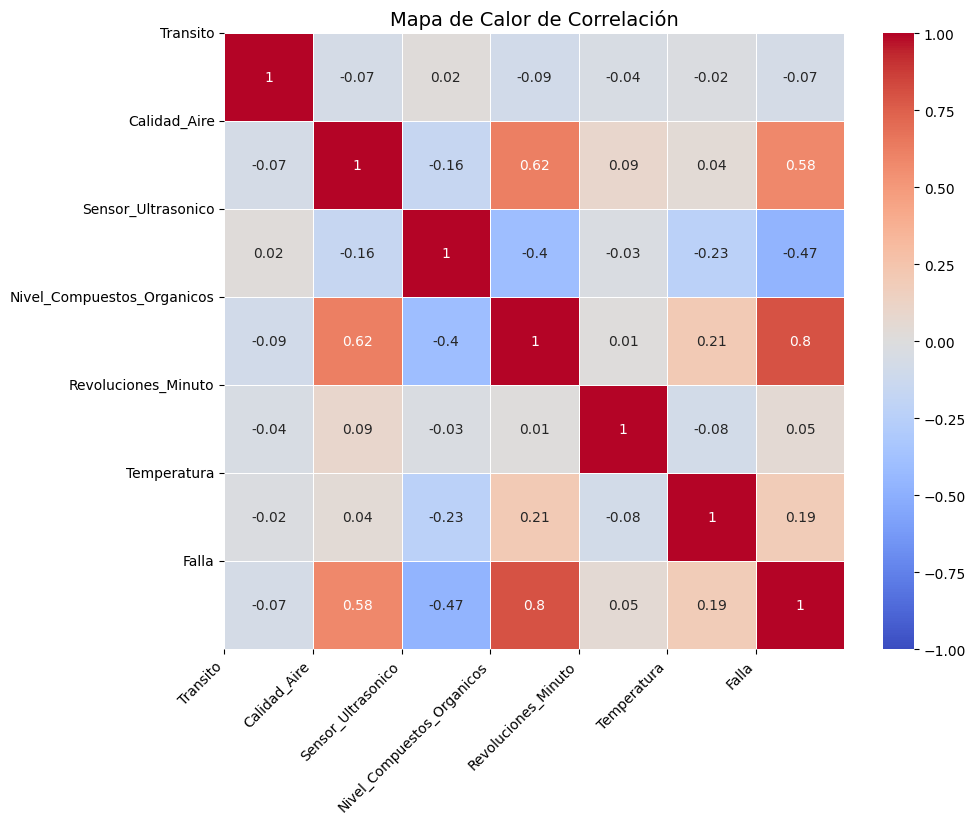

In [20]:
# Definir etiquetas para los ejes
xlabs = columnas_numericas
ylabs = xlabs  # Son las mismas para filas y columnas

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
ax = sns.heatmap(matriz_correlacion, vmin=-1, vmax=1, annot=True, cmap="coolwarm", linewidths=0.5)

# Configurar las etiquetas de los ejes
ax.set_xticks(np.arange(len(xlabs)))
ax.set_yticks(np.arange(len(ylabs)))

ax.set_xticklabels(xlabs, rotation=45, ha="right")  # Rotar etiquetas del eje X para mejor visibilidad
ax.set_yticklabels(ylabs, rotation=0)

# Agregar título
ax.set_title("Mapa de Calor de Correlación", fontsize=14)

# Mostrar el gráfico
plt.show()

# Interpretación de la Matriz de Correlación:
1. **Correlación positiva fuerte (> 0.7)**:
   - *Nivel_Compuestos_Organicos* y *Falla* tienen una correlación de 0.80, indicando que a mayor nivel de compuestos orgánicos, es más probable que ocurra una falla en la máquina.

2. **Correlación negativa moderada (< -0.5)**:
   - *Sensor_Ultrasonico* y *Falla* tienen una correlación de -0.47, sugiriendo que el aumento en el valor del sensor ultrasónico está moderadamente relacionado con la disminución de fallas.

3. **Correlación débil o nula (cerca de 0)**:
   - *Transito* y *Sensor_Ultrasonico* tienen una correlación de 0.02, lo que indica que no hay una relación significativa entre el tráfico y los datos del sensor ultrasónico.
   

   Elegimos el código del color COOLWARM ya que ayuda a identificar fácilmente tendencias de correlación

# **Posible resolución de preguntas**

**¿Cómo afecta la calidad del aire y el aumento de nivel de compuestos orgánicos el funcionamiento de las máquinas?**

In [21]:
# Definir variables de interés
columnas_numericas = ["Calidad_Aire", "Nivel_Compuestos_Organicos", "Falla"]

# Estadísticas descriptivas
print("\nEstadísticas de Locación y Variabilidad:")
print(df[columnas_numericas].describe(percentiles=[0.25, 0.5, 0.75]))


Estadísticas de Locación y Variabilidad:
       Calidad_Aire  Nivel_Compuestos_Organicos       Falla
count    943.000000                  943.000000  943.000000
mean       4.326617                    2.844115    0.416755
std        1.438551                    2.273751    0.493283
min        1.000000                    0.000000    0.000000
25%        3.000000                    1.000000    0.000000
50%        4.000000                    2.000000    0.000000
75%        6.000000                    5.000000    1.000000
max        7.000000                    6.000000    1.000000


In [22]:
# Crear una nueva columna que sea la diferencia entre 'Calidad_Aire' y 'Nivel_Compuestos_Organicos'
df['diferencia_calidad_nivel'] = df['Calidad_Aire'] - df['Nivel_Compuestos_Organicos']

# Calcular el rango de la nueva columna
rango_diferencia = df['diferencia_calidad_nivel'].max() - df['diferencia_calidad_nivel'].min()

# Imprimir el resultado
print(f"Rango de la diferencia entre Calidad_Aire y Nivel_Compuestos_Organicos: {rango_diferencia}")

Rango de la diferencia entre Calidad_Aire y Nivel_Compuestos_Organicos: 11


*Interpretación:
El rango, nos muestra que hay diferencia entre las variables es alta, lo cual nos puede responder que la maquina cuando es expuesta a peores condiciones ambientales, puede causar fallas*

In [23]:
# Datos en un diccionario
datos = {
   'Calidad_Aire': 1.000000,
   'Nivel_Compuestos_Organicos': 0.618271,
   'Falla': 0.582895
}
print(datos)

{'Calidad_Aire': 1.0, 'Nivel_Compuestos_Organicos': 0.618271, 'Falla': 0.582895}


In [24]:
# Función para concatenar los datos
def concatenar_datos(variables):
    concatenado = ""
    for variable, valor in datos.items():
        concatenado += f"{variable}: {valor}\n"  # Añadir cada variable y su valor en una nueva línea
    return concatenado.strip()  # Eliminar el espacio en blanco al final

# Uso de la función
resultado = concatenar_datos(datos)
print("Datos concatenados:\n")
print(resultado)

Datos concatenados:

Calidad_Aire: 1.0
Nivel_Compuestos_Organicos: 0.618271
Falla: 0.582895


In [25]:
# Obtenemos la correlación para verificar las relaciones entre las variables
variables_interes = ['Calidad_Aire', 'Nivel_Compuestos_Organicos', 'Falla']
matriz_correlacion_interes = df[variables_interes].corr()

# Mostrar la matriz de correlación
print(matriz_correlacion_interes)

                            Calidad_Aire  Nivel_Compuestos_Organicos     Falla
Calidad_Aire                    1.000000                    0.618271  0.582895
Nivel_Compuestos_Organicos      0.618271                    1.000000  0.797182
Falla                           0.582895                    0.797182  1.000000


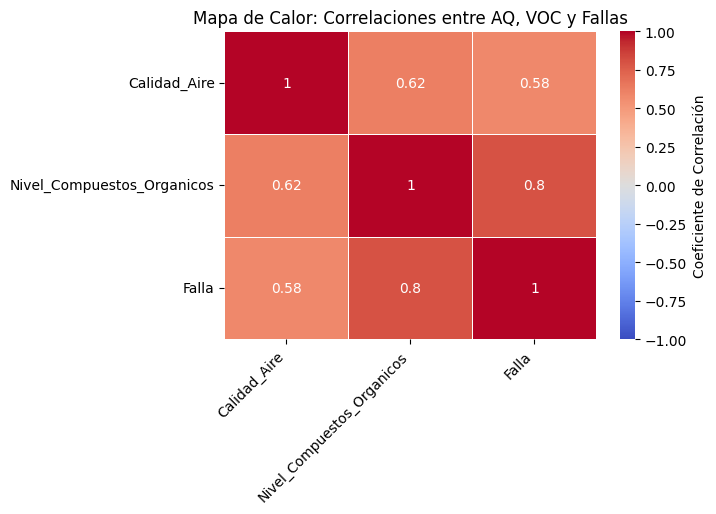

In [26]:
# Mapa de calor
plt.figure(figsize=(6, 4))

# Crear el mapa de calor con mejor formato
ax = sns.heatmap(matriz_correlacion_interes, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, cbar_kws={'label': 'Coeficiente de Correlación'})

# Agregar etiquetas a los ejes
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

# Agregar título
plt.title("Mapa de Calor: Correlaciones entre AQ, VOC y Fallas", fontsize=12)

# Mostrar la figura
plt.show()

*La correlación entre las variables Calidad_Aire y Nivel_Compuestos_Organicos es de .62, lo que nos muestra una relación moderada positiva, que nos confirma nuevamente que cuando la calidad del aire empeora, también los compuestos orgánicos cercanos a la máquina.
Al analizar la calidad del aire con falla nos muestra que las maquinas que estás en condiciones malas de aire, presentan más fallas y la correlación de compuestos organicos con falla es más alta (.797) demostrando que La calidad del aire y el nivel de compuestos organicos están asociados al aumento de fallas, pudiendo interferir con los sensores de la maquina*

In [27]:
# Hacemos análisis de rango de las variables para saber como se están midiendo
print(df[['Calidad_Aire', 'Nivel_Compuestos_Organicos']].describe())

       Calidad_Aire  Nivel_Compuestos_Organicos
count    943.000000                  943.000000
mean       4.326617                    2.844115
std        1.438551                    2.273751
min        1.000000                    0.000000
25%        3.000000                    1.000000
50%        4.000000                    2.000000
75%        6.000000                    5.000000
max        7.000000                    6.000000


**Indice de calidad del aire**

"El índice de calidad del aire (ICA) es una medida de las concentraciones de contaminantes atmosféricos en el aire ambiente y sus riesgos asociados para la salud." (IQAir | First In Air Quality, s. f.)

Valores bajos (~1-3): Buena calidad del aire.

Valores medios (~4-5): Calidad media, algo de contaminación.

Valores altos (~6-7): Mala calidad del aire.

**Nivel de compuestos orgánicos**
"Los compuestos orgánicos volátiles o COV son sustancias químicas orgánicas que se convierten en gas a temperatura ambiente y son el principal origen de la contaminación del aire a nivel del suelo." (Tecam, 2021)

Valores bajos (~0-2): Buena calidad del aire.

Valores medios (~3-4): Calidad media, algo de contaminación.

Valores altos (~5-6): Mala calidad del aire.

In [28]:
# Tabla de frecuencias
# Creamos intervalos para Calidad_Aire y Nivel_Compuestos_Organicos
df['Rango_Calidad_Aire'] = pd.cut(df['Calidad_Aire'], bins=5)
df['Rango_VOC'] = pd.cut(df['Nivel_Compuestos_Organicos'], bins=5)

# Creamos tabla de frecuencia entre Falla y Rango de Calidad_Aire
tabla_frecuencia_CA = pd.crosstab(df['Falla'], df['Rango_Calidad_Aire'])

# Creamos tabla de frecuencia entre Falla y Rango de Nivel de compuestos orgánicos
tabla_frecuencia_VOC = pd.crosstab(df['Falla'], df['Rango_VOC'])

# Imprimimos tablas
print("Tabla de Frecuencia Falla vs Calidad_Aire")
print(tabla_frecuencia_CA)

print("\nTabla de Frecuencia Falla vs VOC")
print(tabla_frecuencia_VOC)

Tabla de Frecuencia Falla vs Calidad_Aire
Rango_Calidad_Aire  (0.994, 2.2]  (2.2, 3.4]  (3.4, 4.6]  (4.6, 5.8]  \
Falla                                                                  
0                            115         135         183          73   
1                              4          11          73          97   

Rango_Calidad_Aire  (5.8, 7.0]  
Falla                           
0                           44  
1                          208  

Tabla de Frecuencia Falla vs VOC
Rango_VOC  (-0.006, 1.2]  (1.2, 2.4]  (2.4, 3.6]  (3.6, 4.8]  (4.8, 6.0]
Falla                                                                   
0                    365         101          26          24          34
1                     14           7          11          70         291


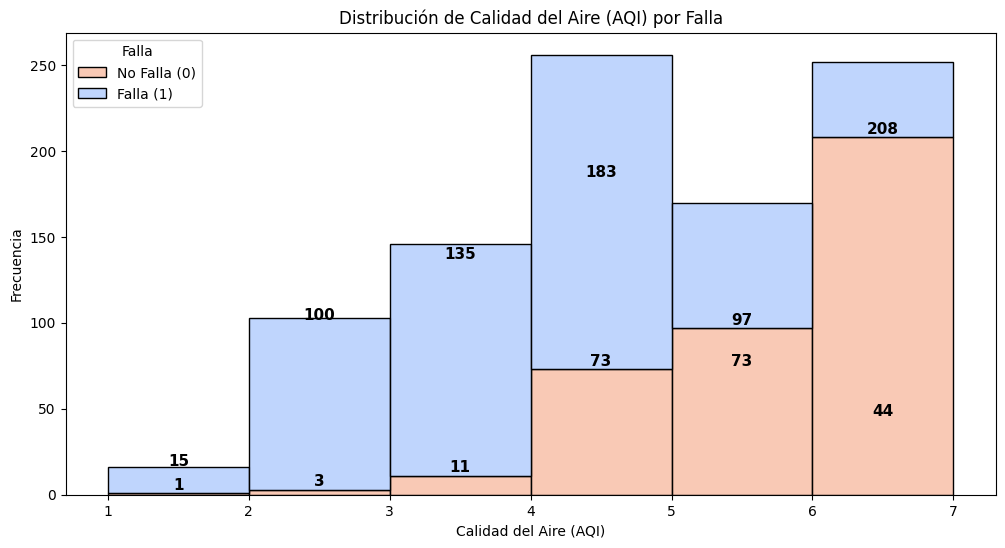

In [29]:
# Realizamos histograma de Falla VS Calidad del Aire
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x="Calidad_Aire", hue="Falla", multiple="stack", bins=6, palette="coolwarm")

# Agregamos etiquetas a las barras del histograma
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Para evitar etiquetas en barras inexistentes
        ax.text(p.get_x() + p.get_width() / 2, height + 2, int(height),
                ha='center', fontsize=11, color="black", weight="bold")

# Configuración del gráfico
plt.title("Distribución de Calidad del Aire (AQI) por Falla")
plt.xlabel("Calidad del Aire (AQI)")
plt.ylabel("Frecuencia")
plt.legend(title="Falla", labels=["No Falla (0)", "Falla (1)"])

plt.show()

*Este es un histograma apilado, el color anaranjado representa a las máquinas que no fallaron, mientras que el color azul representa a las que sí fallaron, podemos observar que se analiza la frecuencia de las fallas en relacion a la calidad del aire, cuando la calidad del aire llega a sus valores altos, presentan gran número de fallas,por ejemplo, en los niveles de AQI bajos, se observan menos fallas en la máquina, mientras que en los intermedios y altos, la frecuencia de las fallas aumenta. El histograma tiene forma bimodal y ligeramente asimétrico*

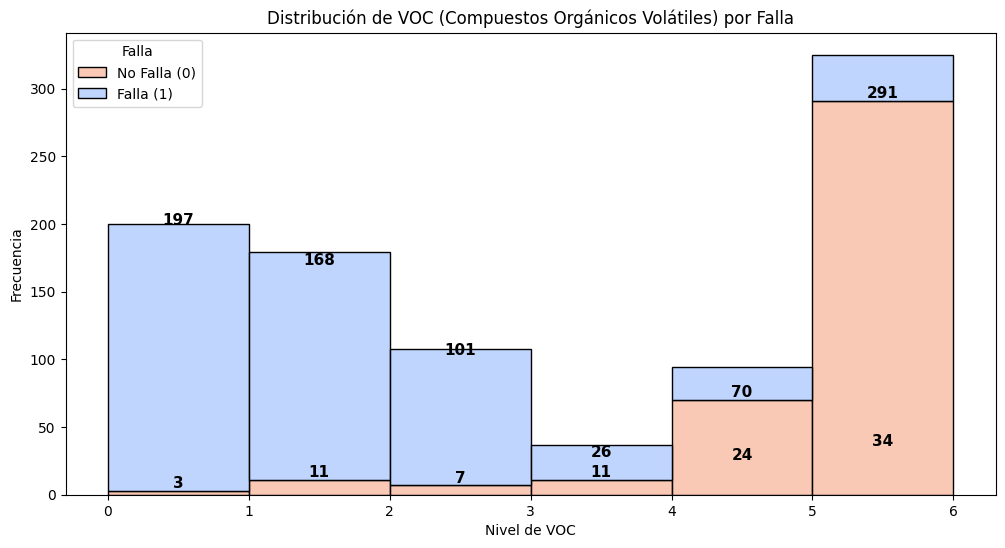

In [30]:
# Realizamos histograma de Fallas vs Nivel de Compuestos Orgánicos
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x="Nivel_Compuestos_Organicos", hue="Falla", multiple="stack", bins=6, palette="coolwarm")

# Agregamos etiquetas a las barras del histograma
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Para evitar etiquetas en barras inexistentes
        ax.text(p.get_x() + p.get_width() / 2, height + 2, int(height),
                ha='center', fontsize=11, color="black", weight="bold")

# Configuración del gráfico
plt.title("Distribución de VOC (Compuestos Orgánicos Volátiles) por Falla")
plt.xlabel("Nivel de VOC")
plt.ylabel("Frecuencia")
plt.legend(title="Falla", labels=["No Falla (0)", "Falla (1)"])

plt.show()

*Este es un histograma apilado, el color anaranjado representa a las máquinas que no fallaron, mientras que el color azul representa a las que sí fallaron, podemos observar que se analiza la frecuencia de las fallas en relacion al Nivel de compuestos orgánicos, cuando este llega a sus valores altos, las máquinas presentan fallas, El histograma tiene forma bimodal y asimétrico*

**¿Cómo se relaciona el transito de personas o de objetos cerca de la máquina en las fallas que presentan?**
El valor de 1.000000 en la diagonal indica que cada variable está perfectamente correlacionada consigo misma.
El valor de -0.073324 entre "Tránsito" y "Falla" sugiere una correlación negativa muy débil.
El valor es muy cercano a cero, esto indica que no hay una relación significativa entre el tránsito y las fallas, el tránsito no tiene un efecto notable en las fallas de la máquina. Eso nos permite buscar otros factores,que determinen las fallas.


In [31]:
# Obtenemos la correlación para verificar las relaciones entre las variables
variables_interes = ['Transito', 'Falla']
matriz_correlacion_interes = df[variables_interes].corr()

# Mostrar la matriz de correlación
print(matriz_correlacion_interes)

          Transito     Falla
Transito  1.000000 -0.073324
Falla    -0.073324  1.000000


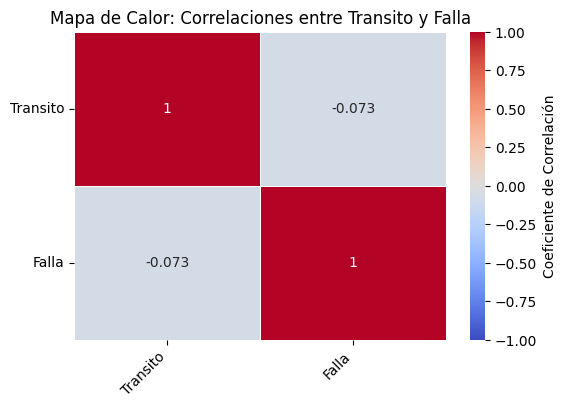

In [32]:
# Hacemos mapa de calor
plt.figure(figsize=(6, 4))

# Crear el mapa de calor
ax = sns.heatmap(matriz_correlacion_interes, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, cbar_kws={'label': 'Coeficiente de Correlación'})

# Agregar etiquetas a los ejes
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

# Agregar título
plt.title("Mapa de Calor: Correlaciones entre Transito y Falla", fontsize=12)

# Mostrar la figura
plt.show()

*Se puede observar, que la relación entre estas dos columnas es muy baja, que nos da a entender, que el transito de objetos y personas al rededor de la máquina, no se relaciona mucho con las fallas*

In [33]:
# Datos en un diccionario
datos = {
   'Transito': 1.000000,
   'Falla': -0.073324,
}
print(datos)

{'Transito': 1.0, 'Falla': -0.073324}


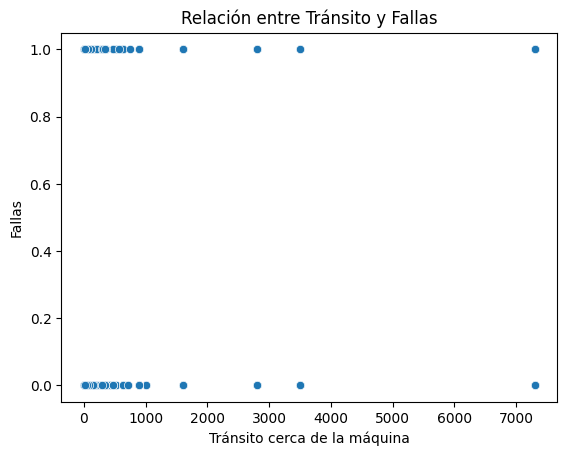

In [34]:
# Hacemos mapas de dispersión para ver como se distribuyen las fallas respecto al nivel de transito
sns.scatterplot(x=df['Transito'], y=df['Falla'])
plt.title("Relación entre Tránsito y Fallas")
plt.xlabel("Tránsito cerca de la máquina")
plt.ylabel("Fallas")
plt.show()

*Este gráfico nos muestra si se relacionan estas dos variables, lo que podemos observar es que las fallas se presentan más cuando el tránsito alrededor de la máquina es bajo pero no parece ser una variable importante para el análisis*

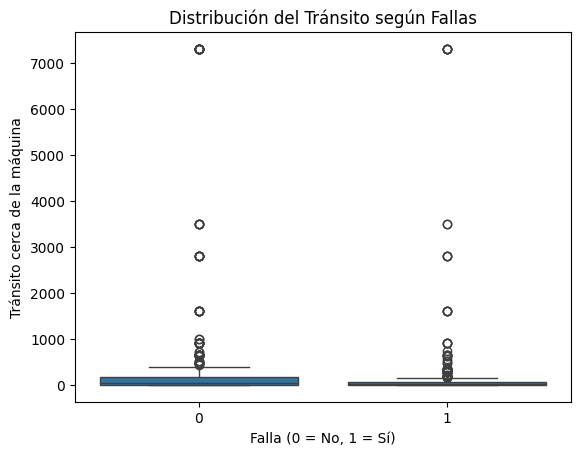

In [35]:
# Hacemos gráfico de Bloxpot para comparar como se distribuye el transito en casos con fallas o sin fallas
sns.boxplot(x=df['Falla'], y=df['Transito'])
plt.title("Distribución del Tránsito según Fallas")
plt.xlabel("Falla (0 = No, 1 = Sí)")
plt.ylabel("Tránsito cerca de la máquina")
plt.show()

<ipython-input-36-92cca079b1b6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=df['Falla'], y=df['Transito'], ci=None, palette="magma", width=0.5, edgecolor="black")
<ipython-input-36-92cca079b1b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['Falla'], y=df['Transito'], ci=None, palette="magma", width=0.5, edgecolor="black")


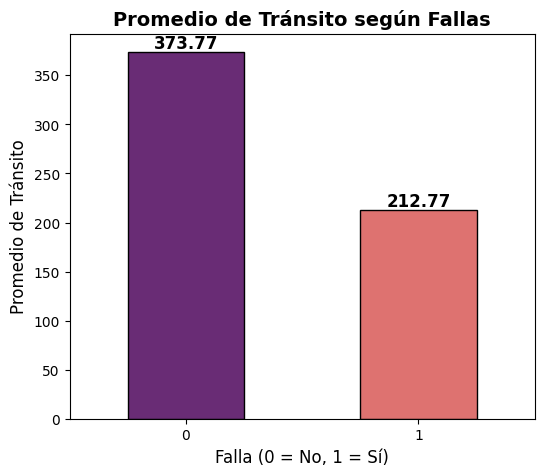

In [36]:
# Hacemos gráfico de barras para mostrar el promedio de transito en caso de falla o no
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=df['Falla'], y=df['Transito'], ci=None, palette="magma", width=0.5, edgecolor="black")

# Agregar etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Personalizar el título y etiquetas
plt.title("Promedio de Tránsito según Fallas", fontsize=14, fontweight='bold')
plt.xlabel("Falla (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Promedio de Tránsito", fontsize=12)

# Mostrar el gráfico
plt.show()

*Con este gráfico, observamos que cuando no hay fallas, el tránsito promedio es de 373.77 y cuando hay fallas el tránsito promedio baja a 212.77, lo que nos da a entender que posiblemente la máquina requiere supervición o mantenimiento*

**¿La temperatura aumenta la falla de las máquinas cuando es mayor? (La variabilidad de la temperatura está relacionada con la falla de la máquina)**

In [37]:
# Obtenemos la temperatura promedio según las fallas
promedios_temp_falla = df.groupby('Falla')['Temperatura'].mean() # Agrupamos los datos y calculamos promedios
print(promedios_temp_falla)


Falla
0    15.361818
1    17.676845
Name: Temperatura, dtype: float64


*Las máquinas con fallas, tienen una temperatura promedio más alta que las que no presentan fallas*

In [38]:
# Imprimimos los primeros valores de la columna Temperatura para crear una serie
print("Primeros valores de Temperatura:")
print(df['Temperatura'].head())

Primeros valores de Temperatura:
0    1
1    1
2    1
3    1
4    1
Name: Temperatura, dtype: int64


In [39]:
# Utilizamos describe() para conocer el rango de los valores
print("Estadísticas descriptivas de Temperatura:")
print(df['Temperatura'].describe())

# El valor máximo es 24

Estadísticas descriptivas de Temperatura:
count    943.000000
mean      16.326617
std        5.976014
min        1.000000
25%       14.000000
50%       17.000000
75%       21.000000
max       24.000000
Name: Temperatura, dtype: float64


In [40]:
# Creamos una serie con la diferencia entre temperaturas consecutivas
df['Delta_Temperatura'] = df['Temperatura'].diff()

print("Variación de la Temperatura respecto a la fila anterior:")
print(df[['Temperatura', 'Delta_Temperatura']].head(943))

Variación de la Temperatura respecto a la fila anterior:
     Temperatura  Delta_Temperatura
0              1                NaN
1              1                0.0
2              1                0.0
3              1                0.0
4              1                0.0
..           ...                ...
939           24                0.0
940           24                0.0
941           24                0.0
942           24                0.0
943           24                0.0

[943 rows x 2 columns]


El resultado nos muestra que hay poca variabilidad en las diferencias.

In [41]:
# Agrupamos los valores en categorías para mejorar su análisis
# Creamos categorpias de temperatura
df['Categoria_Temperatura'] = pd.cut(df['Temperatura'], # pd. Cut: divide en grupos o datos continuos
                                     bins=[0, 10, 18, 24], # Bins: Intervalos
                                     labels=['Baja', 'Media', 'Alta']) # Labels: Nombre de los intervalos

# Imprimimos las primeras filas
print(df[['Temperatura', 'Categoria_Temperatura']].head())


   Temperatura Categoria_Temperatura
0            1                  Baja
1            1                  Baja
2            1                  Baja
3            1                  Baja
4            1                  Baja


In [42]:
# Calculamos la tasa de fallas por categoría de temperatura
tasa_fallas = df.groupby('Categoria_Temperatura', observed=False)['Falla'].mean()

# Convertirmos a porcentajes y redondearmos a 2 decimales para mejorar el análisis
tasa_fallas_porcentual = (tasa_fallas * 100).round(2)

# Creamos una tabla clara en formato DataFrame
tabla_tasa_fallas = pd.DataFrame({
    'Categoria_Temperatura': tasa_fallas_porcentual.index,
    'Tasa de Fallas (%)': tasa_fallas_porcentual.values
})

# Imprimimos la tabla la tabla
print("Tabla de tasa de fallas por categoría de temperatura:")
print(tabla_tasa_fallas)

Tabla de tasa de fallas por categoría de temperatura:
  Categoria_Temperatura  Tasa de Fallas (%)
0                  Baja               25.17
1                 Media               39.35
2                  Alta               49.64


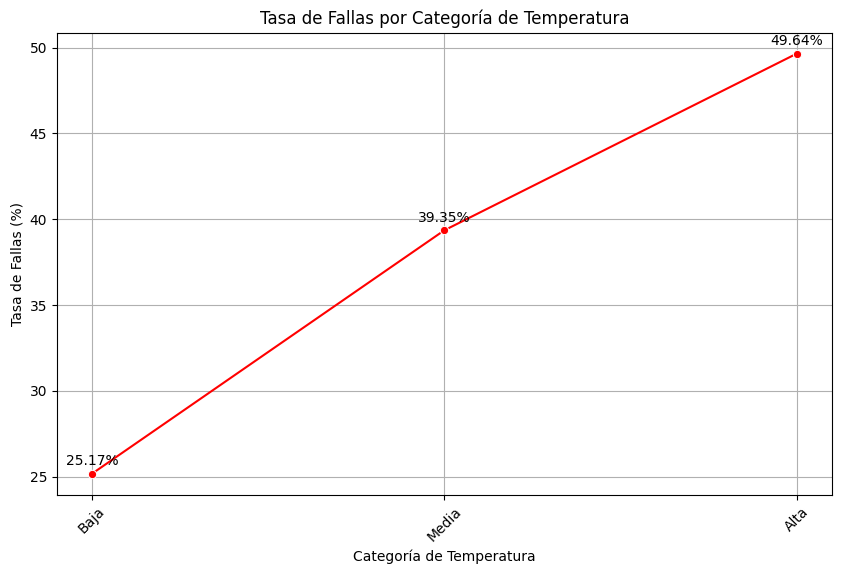

In [43]:
# Hacemos gráfico de líneas para visualizar las tendencias
plt.figure(figsize=(10, 6))
sns.lineplot(x='Categoria_Temperatura', y='Tasa de Fallas (%)', data=tabla_tasa_fallas, marker='o', color='red')

# Agregar etiquetas en cada punto del gráfico
for i, row in tabla_tasa_fallas.iterrows():
    plt.text(row['Categoria_Temperatura'], row['Tasa de Fallas (%)'] + 0.5,
             f"{row['Tasa de Fallas (%)']}%", ha='center', fontsize=10, color='black')

# Personalización del gráfico
plt.title('Tasa de Fallas por Categoría de Temperatura')
plt.xlabel('Categoría de Temperatura')
plt.ylabel('Tasa de Fallas (%)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.grid(True)

plt.show()

*Con este gráfico podemos observar las tendencias que tiene la variable de temperatura
La tasa de fallas aumenta a medida que la temperatura sube.
En temperaturas bajas, solo el 25.17% de las máquinas fallan.
En temperaturas medias, la tasa de fallas sube a 39.35%.
En temperaturas altas, el 49.64% de las máquinas presentan fallas, lo que indica un impacto significativo.*

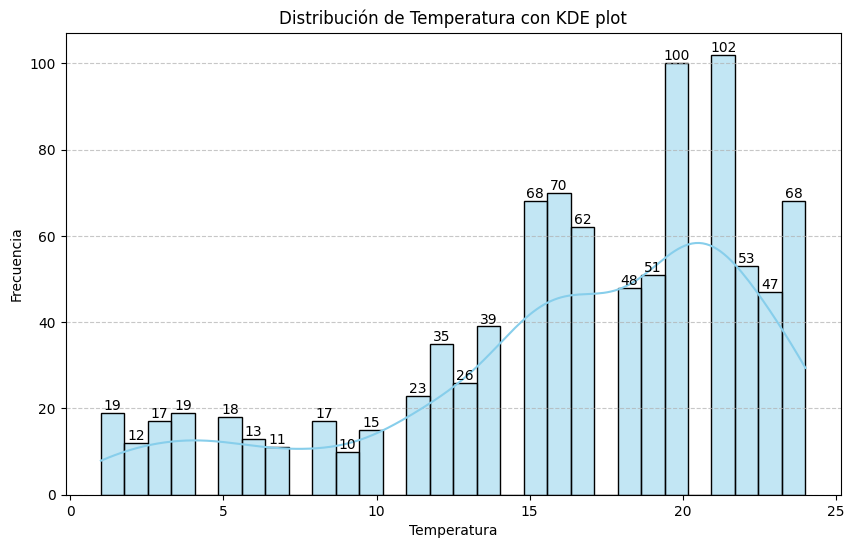

In [44]:
# Hacemos histograma para mostrar la frecuencia de los rangos de la temperatura
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Temperatura'], kde=True, bins=30, color='skyblue')

# Agregar etiquetas a las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Evitar etiquetas en barras vacías
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Personalización del gráfico
plt.title('Distribución de Temperatura con KDE plot')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas guía en el eje Y
plt.show()

*El gráfico sugiere que la mayoría de las observaciones de temperatura están entre 14°C y 22°C, con una mayor concentración alrededor de 20°C. También muestra cierta variabilidad en temperaturas más bajas, pero con menos frecuencia. Con este resultado, podemos observar que en la categoría alta, se observa un porcentaje mayor, lo cuál nos demuestra que hay una relación entre las fallas y la temperatura, pudiendo tener como conclusión que si aumenta la temperatura de la máquina, esta puede presentar fallas.*

**¿Qué factores provocan más fallas?**



In [45]:
# Calcular correlaciones entre variables numéricas y fallas
correlaciones = df.select_dtypes(include=np.number).corr()['Falla'].sort_values(ascending=False)
print(correlaciones)

Falla                         1.000000
Nivel_Compuestos_Organicos    0.797182
Calidad_Aire                  0.582895
Temperatura                   0.191091
Presion_Entrada               0.086497
Revoluciones_Minuto           0.053740
Consumo_Corriente             0.019292
Modo_Temperatura             -0.014043
Delta_Temperatura            -0.049832
Transito                     -0.073324
Sensor_Ultrasonico           -0.466712
diferencia_calidad_nivel     -0.544968
Name: Falla, dtype: float64


In [46]:
# Calculamos la tasa de fallas
tasa_fallas = df['Falla'].mean() * 100 #Nos permite obtener la frecuencia de las fallas
print(f"Tasa general de fallas: {tasa_fallas:.2f}%")

Tasa general de fallas: 41.68%


In [47]:
# Importar pandas
import pandas as pd
# Montar Drive
file_path = '/content/drive/MyDrive/fallas_en_maquina.csv'
df = pd.read_csv(file_path)
# Importar librerias
import seaborn as sns
import matplotlib.pyplot as plt

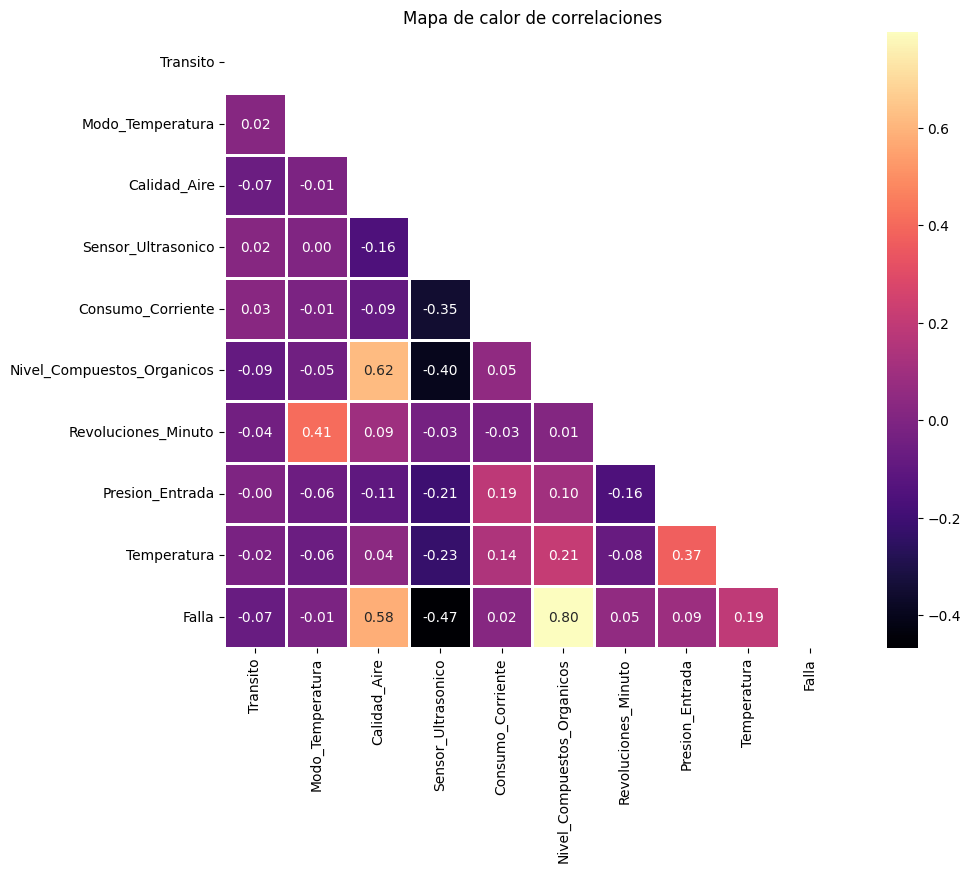

In [48]:
# Mapa de Calor de correlaciones
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='magma', fmt='.2f', linewidths=1, square=True)
plt.title('Mapa de calor de correlaciones')
plt.show()

***Variables que se asocian con la aparición de fallas.***

1.-Nivel_Compuestos_Organicos (+0.80): Un mayor nivel de compuestos orgánicos afecta el rendimiento de la máquina. El nivel de compuestos organicos tiene un fuerte impacto en el funcionamiento de la máquina, que como conclusión obtenemos que posiblemente los compuestos orgánicos dañen piezas de la máquina.

2.-Calidad_Aire (+0.58): A peor calidad del aire, mayor probabilidad de falla.  La calidad del aire, sigue siendo un factor importante para que se presenten fallas, en este caso, la categoria POBRE, nos da un porcentaje del 82.53% de fallas

3.-Temperatura (+0.19): A más alta temperatura, mayor probabilidad de falla. Con el resultado de la tasa de fallas por temperatura, podemos observar que el mayor porcentaje de fallas se debe a que la temperatura aumenta, lo cual afecta direcamente al funcionamiento de la máquina

***Variables que se asocian menos con la aparición de fallas.***

1.-Presion_Entrada (+0.086)

2.-Revoluciones_Minuto (+0.054)

3.-Consumo_Corriente (+0.019)

***Variables con correlación negativa.***

1.-Sensor_Ultrasonico (-0.47): A valores más altos en la variable existen menos fallas. Esto podría indicar que los sensores ultrasonicos están detectando problemas antes de que se conviertan en fallas.

2.-Transito (-0.073) No es determinante en la predicción, ya que su valor es muy bajo.

3.-Modo_Temperatura (-0.014) No es determinante en la predicción, ya que su valor es muy bajo.

In [49]:
# Agrupamos por categorías para analizar tendencias
# Utilizamos describe() para conocer el rango de los valores para agrupar TRANSITO, Calidad_Aire, Nivel_Compuestos_Organicos, Temperatura y Revoluciones_Minuto
print('Estadísticas descriptivas de Transito, Calidad_Aire, Nivel_Compuestos_Organicos, Temperatura, Revoluciones_Minuto')
print(df[['Transito', 'Calidad_Aire', 'Nivel_Compuestos_Organicos', 'Temperatura', 'Revoluciones_Minuto']].describe())

Estadísticas descriptivas de Transito, Calidad_Aire, Nivel_Compuestos_Organicos, Temperatura, Revoluciones_Minuto
          Transito  Calidad_Aire  Nivel_Compuestos_Organicos  Temperatura  \
count   943.000000    943.000000                  943.000000   943.000000   
mean    306.673383      4.326617                    2.844115    16.326617   
std    1083.144024      1.438551                    2.273751     5.976014   
min       0.000000      1.000000                    0.000000     1.000000   
25%       1.000000      3.000000                    1.000000    14.000000   
50%      22.000000      4.000000                    2.000000    17.000000   
75%     110.000000      6.000000                    5.000000    21.000000   
max    7300.000000      7.000000                    6.000000    24.000000   

       Revoluciones_Minuto  
count           943.000000  
mean             47.042418  
std              16.431816  
min              19.000000  
25%              34.000000  
50%              4

In [50]:
# Agrupaciones y tasas de fallas
categorias = {
    'Transito': [0, 1000, 3000, 7000],
    'Calidad_Aire': [0, 1, 5, 7],
    'Nivel_Compuestos_Organicos': [0, 1, 4, 6],
    'Temperatura': [1, 10, 20, 24],
    'Revoluciones_Minuto': [19, 30, 70, 91]
}

etiquetas = {
    'Transito': ['Bajo', 'Moderado', 'Alto'],
    'Calidad_Aire': ['Buena', 'Moderada', 'Pobre'],
    'Nivel_Compuestos_Organicos': ['Bajo', 'Moderado', 'Alto'],
    'Temperatura': ['Baja', 'Media', 'Alta'],
    'Revoluciones_Minuto': ['Bajo', 'Moderado', 'Alto']
}

for col in categorias:
    df[f'{col}_rango'] = pd.cut(df[col], bins=categorias[col], labels=etiquetas[col])
    tasa_fallas_col = df.groupby(f'{col}_rango', observed=True)['Falla'].mean() * 100
    print(f"Tasa de fallas por {col} (%):")
    print(tasa_fallas_col.round(2).astype(str) + '%')

Tasa de fallas por Transito (%):
Transito_rango
Bajo        38.02%
Moderado    31.82%
Alto        28.57%
Name: Falla, dtype: object
Tasa de fallas por Calidad_Aire (%):
Calidad_Aire_rango
Buena        6.25%
Moderada    27.26%
Pobre       82.54%
Name: Falla, dtype: object
Tasa de fallas por Nivel_Compuestos_Organicos (%):
Nivel_Compuestos_Organicos_rango
Bajo         6.15%
Moderado    36.82%
Alto        89.54%
Name: Falla, dtype: object
Tasa de fallas por Temperatura (%):
Temperatura_rango
Baja     26.52%
Media    41.19%
Alta     51.85%
Name: Falla, dtype: object
Tasa de fallas por Revoluciones_Minuto (%):
Revoluciones_Minuto_rango
Bajo        31.47%
Moderado    43.39%
Alto        44.55%
Name: Falla, dtype: object


*  Con este resultado, podemos observar que entre menos flujo de personas u objetos al rededor de la máquina, tiende a haber más fallas.
*  La calidad del aire, sigue siendo un factor importante para que se presenten fallas, en este caso, la categoria POBRE, nos da un porcentaje del 82.53% de fallas.
* El nivel de compuestos organicos tiene un fuerte impacto en el funcionamiento de la máquina (89.54),como conclusión obtenemos que los compuestos orgánicos dañan piezas de la máquina.
* El nivel de compuestos organicos tiene un fuerte impacto en el funcionamiento de la máquina. En conclusión obtenemos que los compuestos orgánicos dañan piezas de la máquina.
* Si la temperatura aumenta, también es un factor decisivo, siendo la tercera causa con mayor porcentaje (51.85). Una temperatura alta hace que las máquinas presentan fallas.
* Las revoluciones por minuto también se torna relevante para el análisis, ya que posee un (44.55) porciento de falla si la máquina trabaja más.





In [51]:
from sklearn.model_selection import train_test_split
# Construcción del modelo supervisado
# Variables predictoras
X = df.drop(columns=['Falla'])
# Variable objetivo
y = df['Falla']

In [52]:
# Convertir variables categóricas en dummies
X = pd.get_dummies(X, drop_first=True)

In [53]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestClassifier
# Modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
# Predicción y evaluación
y_pred_rf = modelo_rf.predict(X_test)
#Imprimir
print("Reporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       100
           1       0.87      0.91      0.89        89

    accuracy                           0.89       189
   macro avg       0.89      0.90      0.89       189
weighted avg       0.90      0.89      0.89       189

Matriz de confusión:
[[88 12]
 [ 8 81]]


In [56]:
# Importancia de variables
importancias = modelo_rf.feature_importances_
indices = np.argsort(importancias)[::-1]

<ipython-input-57-4191bc4d0cb0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias[indices], y=X.columns[indices], palette='magma')


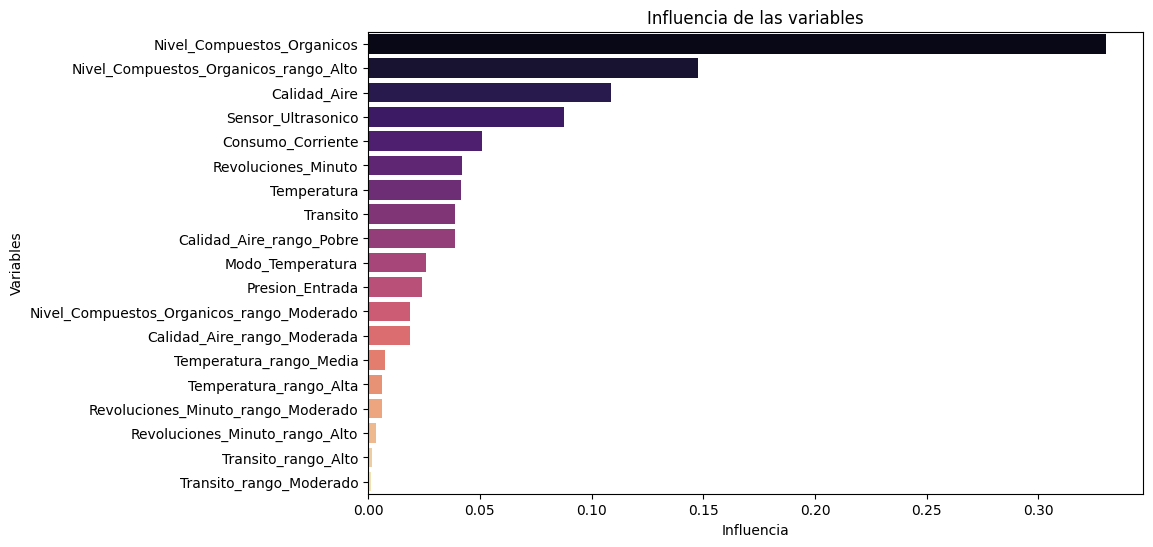

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias[indices], y=X.columns[indices], palette='magma')
plt.title('Influencia de las variables')
plt.xlabel('Influencia')
plt.ylabel('Variables')
plt.show()

***Variables más influyentes en la aparición de fallas***

1.-Nivel_Compuestos_Organicos (42%): Variable más influyente, también coincide con los datos obtenidos en el mapa de calor de correlaciones.

2.-Calidad_Aire (19%): Coincide con el mapa de calor de correlaciones, siendo la segunda causa más importante por las que las maquinas presenten falla, peor calidad de aire, mayor posibilidad de falla.

3.-Sensor_Ultrasonico (13%): En el mapa de calor de correlaciones, el sensor tenía una correlación negativa con la variable "Falla". Lo anterior podría indicarnos que el sensor es capaz de detectar factores antes de que se produzca una falla en el desempeño de las máquinas.

4.-Temperatura (4.5%)

***Variables menos influyentes en la aparición de fallas***

1.-Modo_Temperatura (2.6%)

2.-Presion_Entrada (2.7%)

Como resultado a esta pregunta podemos llegar a la conclusión de que los principales factores que provocan la falla son el nivel de compuestos orgánicos y la calidad del aire, aunque las demás variables también provocan que las máquinas se desgasten y puedan dar como resultado una falla en el momento de la producción. Si las varibales Modo temperatura y Presión entrada fueran eliminadas en próximos analísis no pasaría nada, ya que no interactuan de manera importante en la falla de las máquinas.

**¿Qué tan diferentes son las máquinas que fallan frente a las que no fallan en términos de consumo de corriente?**

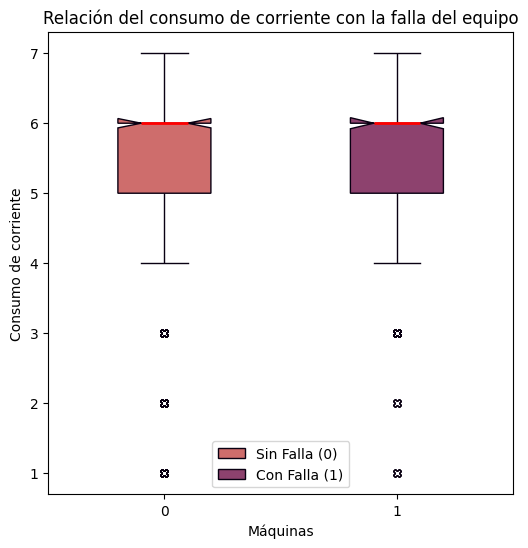

In [58]:
#Realizar un Boxplot de los valores de consumo de corriente

fig = plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=df, x='Falla', y='Consumo_Corriente', hue='Falla',
                 palette='flare',
                 width=0.4,
                 flierprops={"marker": "X"},
                 linecolor="#090012",
                 notch=True,
                 medianprops={"color": "red", "linewidth": 2});
ax.set(title="Relación del consumo de corriente con la falla del equipo",
       xlabel="Máquinas",
       ylabel="Consumo de corriente",);
ax.legend(labels=["Sin Falla (0)", "Con Falla (1)"]);

**Interpretación:**
Ambos casos son muy similares, la distribuición de sus datos presentan una asimetría negativa o sesgada a la izquierda.
En ambos casos la mayoría de los datos tienen valores entre 5 y 6, mientras que los valores más bajos son datos atípicos que se encuentran más allá del límite inferior.

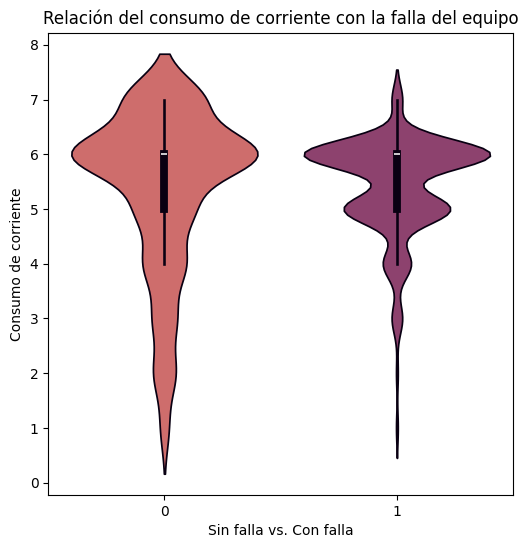

In [59]:
#Realizar un Violinplot de los valores de consumo de corriente

fig = plt.figure(figsize=(6, 6))
ax = sns.violinplot(data=df, x='Falla', y='Consumo_Corriente', hue='Falla',
                    palette="flare", legend=False,
                    linecolor="#090012");
ax.set(title="Relación del consumo de corriente con la falla del equipo",
       xlabel="Sin falla vs. Con falla",
       ylabel="Consumo de corriente");

**Interpretación:** Se observan diferencias más claras entre ambos casos.

Las máquinas que no presentan fallas tienen una mayor frecuencia de datos de menor valor en el consumo de corriente, los cuales son atípicos, además de que presenta una distribución más normal.
La base de datos correspondiente a máquinas que presentan fallas tiene una distribución fluctuante.
Si bien en ambos casos el valor con mayor frecuencia es el 6, las máquinas con fallas tienen una mayor densidad no solo para este valor, si no también para el 5.

**¿Son significativas las diferencias entre máquinas que fallan y que no fallan en términos de consumo de corriente?**

*Test de permutación*

El valor de Alfa es de 0.05

In [60]:
#Promedio del consumo de corriente en ambos casos
df_prom = df.groupby('Falla')['Consumo_Corriente'].agg(Promedio='mean')
print(df_prom)

       Promedio
Falla          
0      5.372727
1      5.422392


In [61]:
#Diferencia de los promedios y su porcentaje
diferencia_prom = (df_prom.loc[1] - df_prom.loc[0]).item()
diferencia_en_porcentaje = ((diferencia_prom / df_prom.loc[0]) * 100).item()

print(f"La diferencia es de: {diferencia_prom: .4f}")
print(f"La diferencia en porcentaje es de: {diferencia_en_porcentaje: .4f}%")

La diferencia es de:  0.0497
La diferencia en porcentaje es de:  0.9244%


In [62]:
#Conteo de datos en máquinas que fallan y que no fallan
test_permutacion = df[['Consumo_Corriente', 'Falla']].copy()
valores_originales = test_permutacion['Falla'].value_counts()
valores_originales

,count
Falla,
0,550
1,393


In [63]:
#Test de permutación

CC_nf = [] #Consumo de corriente en máquinas sin falla
CC_f = [] #Consumo de corriente en máquinas con falla

#Se crea un nuevo conjunto de datos del mismo tamaño que el original con muestreo aleatorio sin reposición
for _ in range(1000):

  f = test_permutacion.sample(valores_originales[1], replace=False)
  CC_f.append(f['Consumo_Corriente'].mean())


  nf = test_permutacion.loc[~test_permutacion.index.isin(f.index)]
  CC_nf.append(nf['Consumo_Corriente'].mean())

In [64]:
#Crear un DataFrame con los resultados
df_prueba = pd.DataFrame({'Promedio_f': CC_f, 'Promedio_nf': CC_nf})
df_prueba

,Promedio_f,Promedio_nf
0,5.351145,5.423636
1,5.386768,5.398182
2,5.379135,5.403636
3,5.463104,5.343636
4,5.447837,5.354545
...,...,...
995,5.290076,5.467273
996,5.366412,5.412727
997,5.450382,5.352727
998,5.458015,5.347273


In [65]:
#Calcular la diferencia de promedios y en porcentaje
df_prueba['dif'] = df_prueba['Promedio_f'] - df_prueba['Promedio_nf']
df_prueba['dif_porcentaje'] = (df_prueba['dif'] / df_prueba['Promedio_nf']) * 100
df_prueba

,Promedio_f,Promedio_nf,dif,dif_porcentaje
0,5.351145,5.423636,-0.072491,-1.336582
1,5.386768,5.398182,-0.011413,-0.211430
2,5.379135,5.403636,-0.024502,-0.453426
3,5.463104,5.343636,0.119468,2.235705
4,5.447837,5.354545,0.093292,1.742290
...,...,...,...,...
995,5.290076,5.467273,-0.177196,-3.241038
996,5.366412,5.412727,-0.046315,-0.855670
997,5.450382,5.352727,0.097654,1.824386
998,5.458015,5.347273,0.110743,2.071010


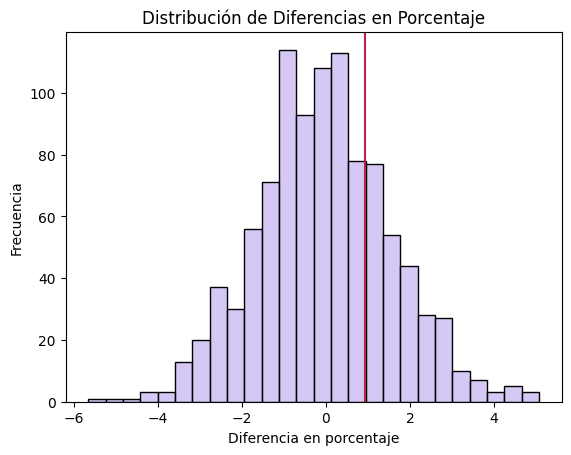

In [66]:
#Visualizar el resultado
sns.histplot(df_prueba['dif_porcentaje'], color='#c8b6f2')
plt.axvline(diferencia_en_porcentaje, color='#ba2247')
plt.title("Distribución de Diferencias en Porcentaje")
plt.xlabel("Diferencia en porcentaje")
plt.ylabel("Frecuencia")
plt.show()

In [67]:
#Calcular el Valor P
p_value = (df_prueba['dif_porcentaje']
           >= diferencia_en_porcentaje).mean()

print(f"Valor P: {p_value:.4f}")

Valor P: 0.2730


**Interpretación:**  Hay una probabilidad considerable de que el resultado haya sido generado por el azar.

Esto es muy diferente al valor de Alfa 0.05 (5%) por lo que el resultado **no es estadísticamente significativo.**

**¿Podemos detectar máquinas con alto riesgo de falla usando un modelo predictivo?**

In [68]:
# Importamos liberías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [69]:
# Seleccionamos las variables más relevantes
variables_importantes = ['Calidad_Aire', 'Nivel_Compuestos_Organicos', 'Temperatura', 'Revoluciones_Minuto']

In [70]:
# Creamos dos series
X = df[variables_importantes]
y = df['Falla']

In [71]:
# Rellenamos valores nulos con la media
X = X.fillna(X.mean())

In [72]:
# Dividimos los datos en conjunto de entrenamiento y prueba para poder evaluar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Variables de interés
variables = ["Calidad_Aire","Nivel_Compuestos_Organicos","Temperatura", "Consumo_Corriente"]
tipo_maquina = "Transito"

In [74]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamos modelo de clasificación (Random Forest en este caso)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Random Forest** es un algoritmo de aprendizaje automático popular que pertenece a la familia de algoritmos ensemble. El aprendizaje ensemble es una técnica en la que se utilizan múltiples modelos para resolver un único problema y se combinan sus resultados para producir una solución más precisa y estable (Random Forest | Interactive Chaos, s. f.)

In [75]:
# Predicción
y_pred = model.predict(X_test)

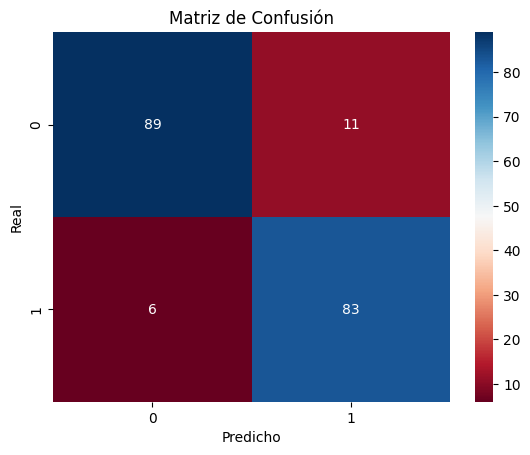

In [76]:
# Evaluamos el desempeño con matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu")
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

La matriz de confusión presentada en el gráfico muestra el desempeño del modelo de clasificación utilizado para predecir fallas en máquinas. Podemos observar que el modelo pudo idenificar de manera correcta 89 máquinas sin falla y 83 con falla, pero, se presentan 11 casos que el modelo no pudo identificar correctamente como si tuvieran falla y 6 como si no tuvieran falla. Con esto, podemos concluir que el modelo predictivo muestra buen desempeño pero que podríamos tomar en cuenta más variables que podrían ser importantes para la predicción.
* Celda superior izquierda (89 - Azul oscuro): Verdaderos negativos (casos sin falla correctamente clasificados).

* Celda superior derecha (11 - Rojo oscuro): Falsos positivos (máquinas clasificadas erróneamente como fallas).

* Celda inferior izquierda (6 - Rojo oscuro): Falsos negativos (máquinas con falla que el modelo no detectó).

* Celda inferior derecha (83 - Azul oscuro): Verdaderos positivos (máquinas con falla correctamente clasificadas).

In [77]:
# Imprimimos métricas de clasificación
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.91005291005291
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       100
           1       0.88      0.93      0.91        89

    accuracy                           0.91       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.91      0.91      0.91       189



<ipython-input-78-56df133c1495>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=df_importancia, palette="RdYlBu")


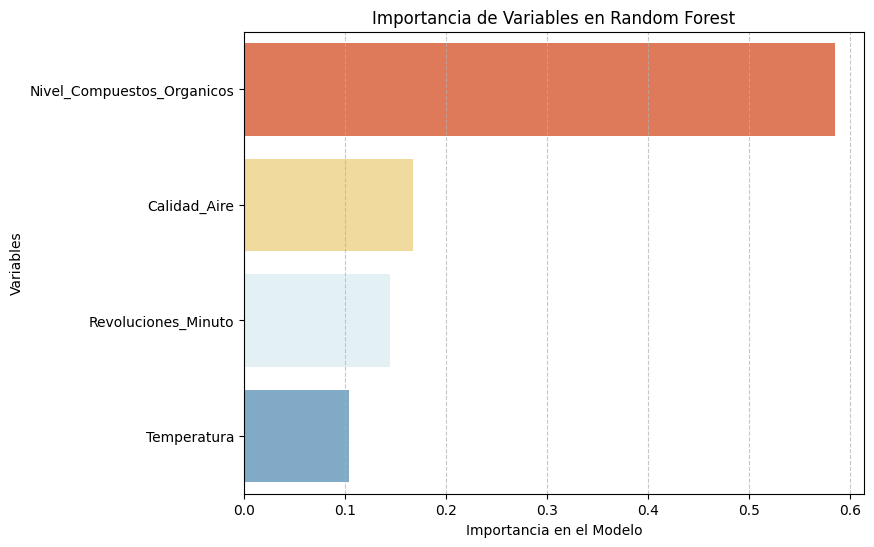

In [78]:
# Hacemos gráfico para conocer la importancia de las variables
importances = model.feature_importances_
variables_importantes = X.columns
# Crear un DataFrame con las importancias
df_importancia = pd.DataFrame({'Variable': variables_importantes, 'Importancia': importances})
df_importancia = df_importancia.sort_values(by="Importancia", ascending=False)  # Ordenar de mayor a menor

# Graficar la importancia de las variables
plt.figure(figsize=(8, 6))
sns.barplot(x="Importancia", y="Variable", data=df_importancia, palette="RdYlBu")
plt.xlabel("Importancia en el Modelo")
plt.ylabel("Variables")
plt.title("Importancia de Variables en Random Forest")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

En este gráfico podemos observar cuales fueron las variables más importantes para la toma de decisiones del modelo predictivo ordenadas de mayor a menor

In [79]:
import plotly.express as px

Se puede apreciar que la calidad del aire, al igual que los niveles de compuestos orgánicos, aumentan la temperatura y afectan el consumo de la corriente lo que genera un nivel mayor de fallas en las máquinas.

In [80]:
# Gráficos interactivos con Plotly
for var in variables:
    fig = px.histogram(df, x=var, color=tipo_maquina, marginal="violin", opacity=0.7,
                       title=f"Distribución de {var} - Tránsito",
                       labels={var: var, tipo_maquina: "Tipo de Máquina"},
                       template="plotly_dark")
    fig.update_layout(bargap=0.2, height=500)
    fig.show()

<ipython-input-81-33e5e384f9ec>:14: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-81-33e5e384f9ec>:14: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-81-33e5e384f9ec>:14: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-81-33e5e384f9ec>:14: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



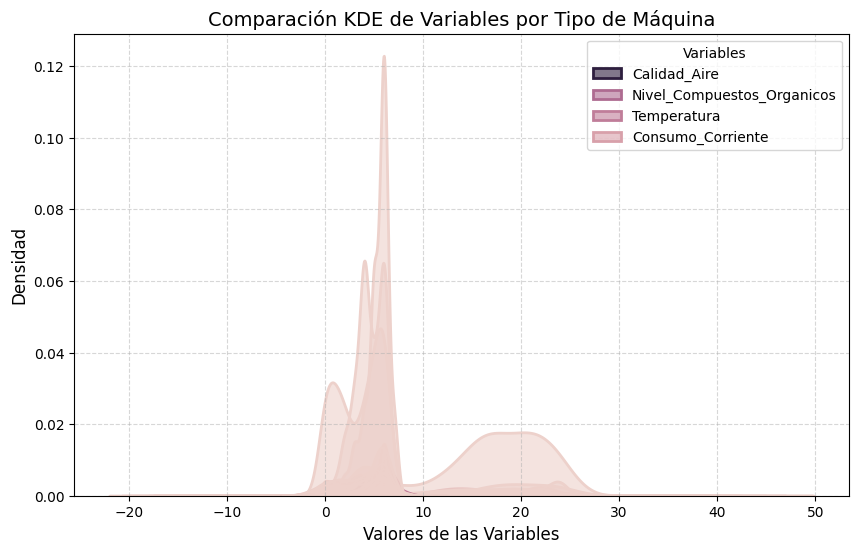

In [81]:
# Histogramas KDE  y violinplots para comparar distribuciones.
# KDE plots para comparar distribuciones

plt.figure(figsize=(10, 6))

# Paleta de colores "Set1" con alto contraste
colores = sns.color_palette("Set1", len(variables))

# Filtrar variables con varianza > 0 (evita el error)
variables_validas = [var for var in variables if np.var(df[var]) > 0]

# Graficar solo variables con varianza mayor a 0
for i, var in enumerate(variables_validas):
    sns.kdeplot(
        data=df, x=var, hue=tipo_maquina,
        fill=True, alpha=0.6, linewidth=2, color=colores[i]
    )

plt.title("Comparación KDE de Variables por Tipo de Máquina", fontsize=14)
plt.xlabel("Valores de las Variables", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(variables_validas, title="Variables", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Se reduce el tamaño de la muestra para poder apreciar las variables de interés a una muestra de 100 datos

In [82]:
# Boxplots para comparar diferentes tipos de máquinas con las variables de  interés
# Gráficos interactivos con Plotly
# Definir el tamaño de la muestra
sample_size = 100  # Muestra de 100
df_sample = df.sample(n=sample_size, random_state=42)  # Muestra aleatoria para evitar sobrecarga

# Variables de interés
variables = ["Calidad_Aire", "Nivel_Compuestos_Organicos", "Temperatura", "Consumo_Corriente"]
tipo_maquina = "Transito"  # En la máquina

# Gráficos interactivos con Plotly
for var in variables:
    fig = px.box(df_sample, x=tipo_maquina, y=var, points="all", color=tipo_maquina,
                 title=f"Comparación de {var} por Tipo de Máquina (Muestra Reducida)",
                 labels={tipo_maquina: "Tipo de Máquina", var: var},
                 template="plotly_dark")

    fig.update_layout(
        xaxis={'categoryorder': 'total descending'},  # Orden automático de categorías
        height=500
    )

    fig.show()

In [83]:
# Modelo de regresión lineal con múltiples variables
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Variables predictoras y objetivo
X = df[["Calidad_Aire", "Nivel_Compuestos_Organicos", "Temperatura","Consumo_Corriente"]]  # Ajustar según los datos
y = df["Falla"]  # Variable de fallas (0: No, 1: Sí)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal Múltiple
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluación del modelo
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

# Modelo de Clasificación (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

# Evaluación del clasificador
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred_class)}")

Error cuadrático medio: 0.08799000752047724
Precisión del modelo: 0.91005291005291


Vemos un alto nivel de confiabilidad del 91% en el modelo ❤

